## Testing IRA

You may ignore...

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('ira.csv')
df.head()

province city_muni  year        ira
0     Abra   Bangued  1992   0.000000
1     Abra   Bangued  1993   7.280949
2     Abra   Bangued  1994  10.311497
3     Abra   Bangued  1995  10.311497
4     Abra   Bangued  1996  12.435710

In [61]:
# sorted(df['year'].value_counts().index.tolist())

In [10]:
df_2016 = df[df.year==2016]
df_2016.head()

province  city_muni  year        ira
24      Abra    Bangued  2016  96.897952
49      Abra    Boliney  2016  56.574216
74      Abra      Bucay  2016  60.534970
99      Abra     Bucloc  2016  35.734824
124     Abra  Daguioman  2016  40.996075

In [11]:
len(df_2016.city_muni)

1626

In [12]:
# set(df_2016.province.tolist())

In [62]:
# df_2016[df_2016.province == 'Metropolitan Manila']

Cities of interest: Pasay, Manila, Makati, San Juan, Mandaluyong

Population data: 
- https://worldpopulationreview.com/countries/cities/philippines
- https://en.wikipedia.org/wiki/List_of_cities_in_the_Philippines

Population as of 2015: 
- Pasay City: 416,522
- Manila: 1,600,000
- Makati City: 510,383
- San Juan: 121,430
- Mandaluyong: 305,576

In [46]:
# cities = ['Pasay City', 'Manila', 'Makati City', 'San Juan', 'Mandaluyong']

# [city for city in df_2016.city_muni.tolist() if city in cities]

In [47]:
df2 = df_2016[(df_2016.province=='Metropolitan Manila') & (df_2016.city_muni.isin(cities))]

city_population_mapping = {'Pasay City': 416522,
                        'Manila': 1600000,
                        'Makati City': 510383,
                        'San Juan': 121430,
                        'Mandaluyong': 305576}

df2['population'] = df2.city_muni.map(city_population_mapping) 

df2.head()

C:\Users\jude_\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


province    city_muni  year          ira  population
23287  Metropolitan Manila  Makati City  2016   944.018174      510383
23334  Metropolitan Manila  Mandaluyong  2016   640.808077      305576
23359  Metropolitan Manila       Manila  2016  2416.221197     1600000
23484  Metropolitan Manila   Pasay City  2016   692.291148      416522
23583  Metropolitan Manila     San Juan  2016   338.540311      121430

## Geospatial Analysis

In [48]:
import geopandas as gpd
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from fuzzywuzzy import process
from shapely.geometry import Polygon, Point

### Using GADM to get PH cities polygons

In [49]:
ph_city_gdf = gpd.read_file("gadm36_PHL_shp/" + "gadm36_PHL_2.shp")
ph_city_gdf.head()

GID_0       NAME_0    GID_1 NAME_1 NL_NAME_1      GID_2     NAME_2  \
0   PHL  Philippines  PHL.1_1   Abra      None  PHL.1.1_1    Bangued   
1   PHL  Philippines  PHL.1_1   Abra      None  PHL.1.2_1    Boliney   
2   PHL  Philippines  PHL.1_1   Abra      None  PHL.1.3_1      Bucay   
3   PHL  Philippines  PHL.1_1   Abra      None  PHL.1.4_1     Bucloc   
4   PHL  Philippines  PHL.1_1   Abra      None  PHL.1.5_1  Daguioman   

  VARNAME_2 NL_NAME_2           TYPE_2     ENGTYPE_2    CC_2    HASC_2  \
0      None      None  Bayan|Munisipyo  Municipality  140101  PH.AB.BN   
1      None      None  Bayan|Munisipyo  Municipality  140102  PH.AB.BL   
2      None      None  Bayan|Munisipyo  Municipality  140103  PH.AB.BU   
3      None      None  Bayan|Munisipyo  Municipality  140104  PH.AB.BC   
4      None      None  Bayan|Munisipyo  Municipality  140105  PH.AB.DG   

                                            geometry  
0  POLYGON ((120.62710 17.49300, 120.62177 17.493...  
1  POLYGON ((120.99042 17.39802, 120.98631 17.387...  
2  POLYGON ((120.70788 17.45395, 120.70621 17.455...  
3  POLYGON ((120.78956 17.41699, 120.78922 17.445...  
4  POLYGON ((120.92917 17.41307, 120.92464 17.413...

In [50]:
# fig, ax = plt.subplots(1, figsize=(15, 12))
# metro_manila_gdf = ph_city_gdf[ph_city_gdf["NAME_1"] == "Metropolitan Manila"]
# metro_manila_gdf.plot(ax=ax)

# for x, y, label in zip(metro_manila_gdf.geometry.centroid.x, 
#                        metro_manila_gdf.geometry.centroid.y, 
#                        metro_manila_gdf.NAME_2):
# #     ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
#     ax.annotate(label, xy=(x, y))


# ax.axis('off');

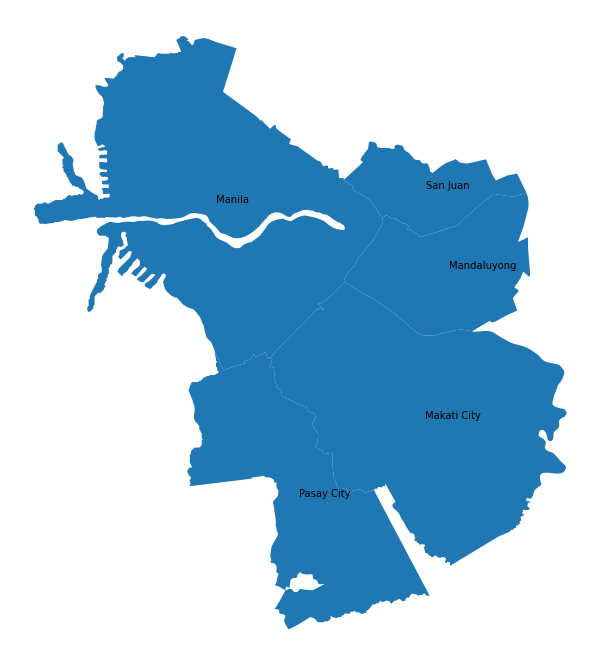

In [51]:
fig, ax = plt.subplots(1, figsize=(15, 12))
metro_manila_gdf = ph_city_gdf[ph_city_gdf["NAME_1"] == "Metropolitan Manila"]
metro_manila_gdf = metro_manila_gdf[metro_manila_gdf["NAME_2"].isin(cities)]
metro_manila_gdf.plot(ax=ax)

for x, y, label in zip(metro_manila_gdf.geometry.centroid.x, 
                       metro_manila_gdf.geometry.centroid.y, 
                       metro_manila_gdf.NAME_2):
#     ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
    ax.annotate(label, xy=(x, y))

ax.axis('off');

In [52]:
metro_manila_gdf

GID_0       NAME_0     GID_1               NAME_1 NL_NAME_1        GID_2  \
962   PHL  Philippines  PHL.47_1  Metropolitan Manila      None   PHL.47.3_1   
964   PHL  Philippines  PHL.47_1  Metropolitan Manila      None   PHL.47.5_1   
965   PHL  Philippines  PHL.47_1  Metropolitan Manila      None   PHL.47.6_1   
970   PHL  Philippines  PHL.47_1  Metropolitan Manila      None  PHL.47.11_1   
974   PHL  Philippines  PHL.47_1  Metropolitan Manila      None  PHL.47.15_1   

          NAME_2                       VARNAME_2 NL_NAME_2           TYPE_2  \
962  Makati City                 Makati, City of      None  Lungsod|Siyudad   
964  Mandaluyong            Mandaluyong, City of      None  Lungsod|Siyudad   
965       Manila  City of Manila|Manila, City of      None  Lungsod|Siyudad   
970   Pasay City                            None      None  Lungsod|Siyudad   
974     San Juan                            None      None  Lungsod|Siyudad   

    ENGTYPE_2    CC_2    HASC_2  \
962      City  137602  PH.MM.MK   
964      City  137401  PH.MM.MD   
965      City  133900  PH.MM.MN   
970      City  137605  PH.MM.PY   
974      City  137405  PH.AB.SJ   

                                              geometry  
962  POLYGON ((121.06578 14.53872, 121.06594 14.538...  
964  POLYGON ((121.05405 14.57747, 121.05408 14.577...  
965  POLYGON ((120.99142 14.56218, 120.98849 14.561...  
970  POLYGON ((121.00084 14.50921, 121.00070 14.509...  
974  POLYGON ((121.02965 14.59402, 121.02961 14.594...

### Getting climate and demographic features

Cities of interest: Pasay, Manila, Makati, San Juan, Mandaluyong

Population data sources: 
- https://worldpopulationreview.com/countries/cities/philippines
- https://en.wikipedia.org/wiki/List_of_cities_in_the_Philippines

Population as of 2015: 
- Pasay City: 416,522
- Manila: 1,600,000
- Makati City: 510,383
- San Juan: 121,430
- Mandaluyong: 305,576

https://en.climate-data.org/asia/philippines/pasay/pasay-3101/
https://en.climate-data.org/asia/philippines/batangas/san-juan-20381/
https://en.climate-data.org/asia/philippines/manila/manila-1952/
https://en.climate-data.org/asia/philippines/makati/makati-3104/
https://en.climate-data.org/asia/philippines/mandaluyong/mandaluyong-1966/

altitude, rainfall, temperature (celsius), density:
- pasay: 8m, 1946mm, 27.3, 30000
- san juan: 21m, 1820mm, 27.2, 21000
- manila: 10m, 2047mm, 27.3, 42000
- makati: 18m, 2013mm, 27.3, 27000
- mandaluyong: 14m, 2093mm, 27.2, 18000

In [63]:
clean_gdf = metro_manila_gdf[['NAME_2', 'geometry']]
clean_gdf.columns = ['city', 'geometry']

clean_gdf['population'] = clean_gdf.city.map(city_population_mapping) 

# sequence: makati, mandaluyong, manila, pasay, san juan
clean_gdf['density'] = [27000, 18000, 42000, 30000, 21000]
clean_gdf['elevation'] = [18, 14, 10, 8, 21]
clean_gdf['rainfall'] = [2013, 2093, 2047, 1946, 1820]
clean_gdf['temperature'] = [27.3, 27.2, 27.3, 27.3, 27.2]

clean_gdf

C:\Users\jude_\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jude_\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\jude_\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

city                                           geometry  \
962  Makati City  POLYGON ((121.06578 14.53872, 121.06594 14.538...   
964  Mandaluyong  POLYGON ((121.05405 14.57747, 121.05408 14.577...   
965       Manila  POLYGON ((120.99142 14.56218, 120.98849 14.561...   
970   Pasay City  POLYGON ((121.00084 14.50921, 121.00070 14.509...   
974     San Juan  POLYGON ((121.02965 14.59402, 121.02961 14.594...   

     population  density  elevation  rainfall  temperature  
962      510383    27000         18      2013         27.3  
964      305576    18000         14      2093         27.2  
965     1600000    42000         10      2047         27.3  
970      416522    30000          8      1946         27.3  
974      121430    21000         21      1820         27.2

### Getting spatial features

Get spatial info from overpass

Query:  
> natural=* in "Manila, Metro Manila"  
> building=* in "Manila, Metro Manila"  
> highway=* in "Manila, Metro Manila"  

buildings have API limit issues

In [87]:
# natural_gdf = gpd.read_file("overpass/metromanila_natural.geojson")
# natural_gdf.head()

In [88]:
# natural_gdf['addr:city'].value_counts()

In [89]:
# natural_gdf.columns

In [90]:
# makati_natural_gdf = gpd.read_file("overpass/makati_natural.geojson")
# makati_natural_gdf.head()

In [86]:
# natural_gdf['is_in:city'].value_counts()

In [92]:
# makati_natural_gdf.shape[0]

340

In [93]:
# sequence: makati, mandaluyong, manila, pasay, san juan
natural = []
highway = []
for city in ['makati', 'mandaluyong', 'manila', 'pasay', 'sanjuan']:
    natural_gdf = gpd.read_file(f"overpass/{city}_natural.geojson")
    highway_gdf = gpd.read_file(f"overpass/{city}_highway.geojson")
    natural += [natural_gdf.shape[0]]
    highway += [highway_gdf.shape[0]]

In [94]:
natural, highway

([340, 29, 287, 493, 26], [6755, 2725, 8970, 4156, 1486])

In [95]:
clean_gdf['natural'] = natural
clean_gdf['road'] = highway

clean_gdf

C:\Users\jude_\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jude_\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


city                                           geometry  \
962  Makati City  POLYGON ((121.06578 14.53872, 121.06594 14.538...   
964  Mandaluyong  POLYGON ((121.05405 14.57747, 121.05408 14.577...   
965       Manila  POLYGON ((120.99142 14.56218, 120.98849 14.561...   
970   Pasay City  POLYGON ((121.00084 14.50921, 121.00070 14.509...   
974     San Juan  POLYGON ((121.02965 14.59402, 121.02961 14.594...   

     population  density  elevation  rainfall  temperature  natural  road  
962      510383    27000         18      2013         27.3      340  6755  
964      305576    18000         14      2093         27.2       29  2725  
965     1600000    42000         10      2047         27.3      287  8970  
970      416522    30000          8      1946         27.3      493  4156  
974      121430    21000         21      1820         27.2       26  1486

### Saving engineered features except polygons

In [98]:
clean_gdf.drop('geometry', axis=1).to_csv('tigerdash.csv')

### Generating GeoJSON (for Mapbox)

format:

{"type":"FeatureCollection","features":[

    {"type":"Feature",
        "id":"01",
        "properties":{"name":"Alabama","density":94.65},
        "geometry":{"type":"Polygon","coordinates":[]}
    },
    ...,
    ...
]}

In [73]:
# lala = clean_gdf.iloc[0]['geometry']
# [list(point) for point in lala.exterior.coords]

In [71]:
tigerdash = {"type":"FeatureCollection","features":[]}

def get_coordinates(geometry):
    return [list(point) for point in geometry.exterior.coords]
    
for i, row in clean_gdf.iterrows():
    tigerdash_city = {"type":"Feature",
        "id": i,
        "properties": {"name": row['city'], "population": row['population'], 
                       "density": row['density'], 
                       "elevation": row["elevation"],
                       "rainfall": row["rainfall"],
                       "temperature": row["temperature"],
                       "natural": row["natural"],
                       "road": row["road"]},
        "geometry":{"type":"Polygon", "coordinates": [get_coordinates(row['geometry'])]}
    }
    tigerdash['features'] += [tigerdash_city]


In [72]:
with open('tigerdash.geojson', 'w+') as f:
    f.write(json.dumps(tigerdash))

In [70]:
[] + [{0}] + [{1}]

[{0}, {1}]